<a href="https://colab.research.google.com/github/geetha-0034/EcoTrace/blob/main/EcoTrace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [46]:
df = pd.read_csv("/content/smart_city_citizen_activity.csv")

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Citizen_ID                   1000 non-null   int64  
 1   Age                          1000 non-null   int64  
 2   Gender                       1000 non-null   object 
 3   Mode_of_Transport            1000 non-null   object 
 4   Work_Hours                   1000 non-null   int64  
 5   Shopping_Hours               1000 non-null   int64  
 6   Entertainment_Hours          1000 non-null   int64  
 7   Home_Energy_Consumption_kWh  1000 non-null   float64
 8   Charging_Station_Usage       1000 non-null   int64  
 9   Carbon_Footprint_kgCO2       1000 non-null   float64
 10  Steps_Walked                 1000 non-null   int64  
 11  Calories_Burned              1000 non-null   int64  
 12  Sleep_Hours                  1000 non-null   float64
 13  Social_Media_Hours 

In [48]:
df.describe()

,Citizen_ID,Age,Work_Hours,Shopping_Hours,Entertainment_Hours,Home_Energy_Consumption_kWh,Charging_Station_Usage,Carbon_Footprint_kgCO2,Steps_Walked,Calories_Burned,Sleep_Hours,Social_Media_Hours,Public_Events_Hours
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,1500.500000,43.81900,4.397000,2.024000,1.532000,5.996900,0.29400,54.416840,10514.961000,818.61300,6.987000,3.007500,1.503600
std,288.819436,14.99103,2.870127,1.421071,1.102811,2.302009,0.45582,26.062576,5588.931531,302.49261,1.710923,1.706249,0.874226
min,1001.000000,18.00000,0.000000,0.000000,0.000000,2.000000,0.00000,10.020000,1011.000000,171.00000,4.000000,0.000000,0.000000
25%,1250.750000,31.00000,2.000000,1.000000,1.000000,4.050000,0.00000,31.717500,5679.500000,581.00000,5.500000,1.600000,0.800000
50%,1500.500000,44.00000,4.000000,2.000000,2.000000,5.870000,0.00000,53.665000,10448.500000,805.00000,7.000000,3.000000,1.500000
75%,1750.250000,56.00000,7.000000,3.000000,2.250000,8.010000,1.00000,77.865000,15377.500000,1070.00000,8.400000,4.400000,2.300000
max,2000.000000,69.00000,9.000000,4.000000,3.000000,9.990000,1.00000,99.930000,19972.000000,1447.00000,10.000000,6.000000,3.000000


In [49]:
# Creating the Dummy Data

data = {
    'Transport_km': [100, 200, 150, 300, 250],
    'Electricity_kWh': [50, 60, 55, 80, 75],
    'Diet_Type': [0, 1, 0, 1, 1],  # 0 = veg, 1 = non-veg
    'Waste_kg': [5, 10, 7, 12, 9],
    'Carbon_Footprint_kgCO2': [70, 120, 90, 150, 130]
}

In [50]:
df = pd.DataFrame(data)

In [51]:
# Selecting the features
# Apply log transform to target # log(1 + x)
features = ['Transport_km', 'Electricity_kWh', 'Diet_Type', 'Waste_kg']
X = df[features]
y = np.log1p(df['Carbon_Footprint_kgCO2'])

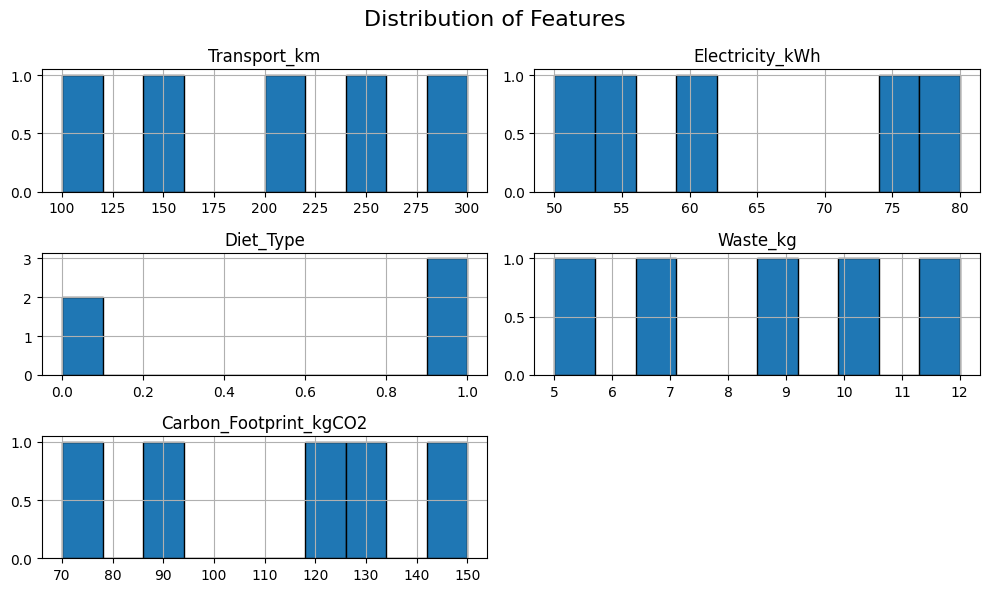

In [52]:
df.hist(bins=10, figsize=(10, 6), edgecolor='black')
plt.suptitle("Distribution of Features", fontsize=16)
plt.tight_layout()
plt.show()

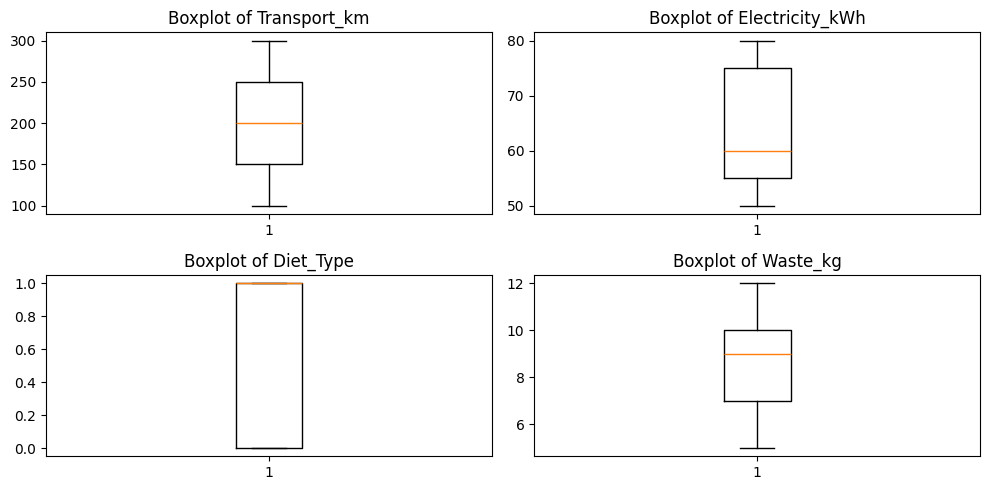

In [53]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(df.columns[:-1], 1):  # Skip target for this
    plt.subplot(2, 2, i)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [54]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [55]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
scaler

StandardScaler()

In [56]:
# Train RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [57]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {round(mse, 2)}")

Test MSE: 0.01


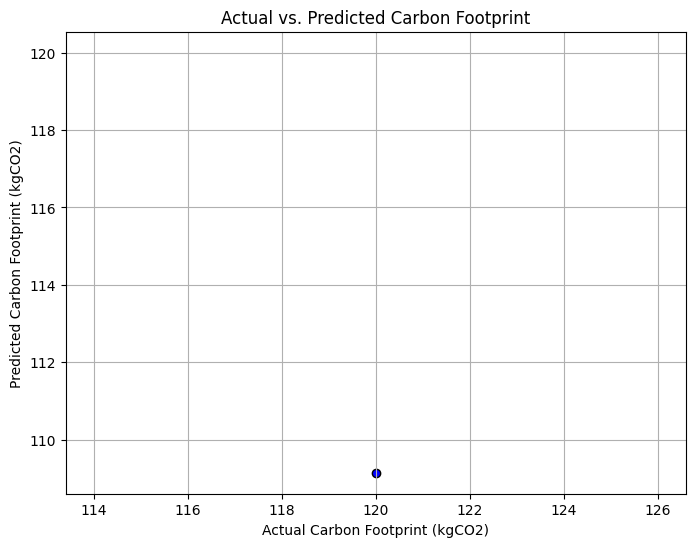

In [58]:
actual = np.expm1(y_test)
predicted = np.expm1(y_pred)

plt.figure(figsize=(8, 6))
plt.scatter(actual, predicted, color='blue', edgecolor='black')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--')  # perfect line
plt.xlabel("Actual Carbon Footprint (kgCO2)")
plt.ylabel("Predicted Carbon Footprint (kgCO2)")
plt.title("Actual vs. Predicted Carbon Footprint")
plt.grid(True)
plt.show()


In [59]:
# Predict new user input
new_input_df = pd.DataFrame([[220, 70, 1, 10]], columns=features)
predicted_value = np.expm1(model.predict(new_input_df)[0])  # Reverse log1p
print(f"Predicted Carbon Footprint: {round(predicted_value, 2)} kgCO2")

Predicted Carbon Footprint: 131.13 kgCO2


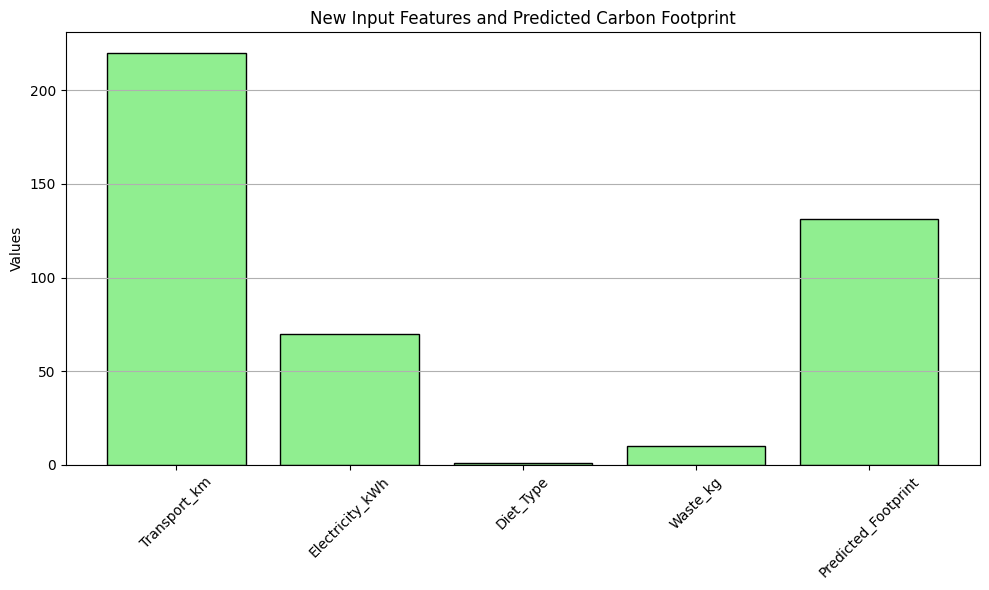

In [60]:
new_input_values = new_input_df.iloc[0].tolist()
new_input_labels = features + ["Predicted_Footprint"]
new_input_values.append(predicted_value)

plt.figure(figsize=(10, 6))
plt.bar(new_input_labels, new_input_values, color='lightgreen', edgecolor='black')
plt.title("New Input Features and Predicted Carbon Footprint")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [61]:
import joblib
joblib.dump(model, 'model.pkl')  # Saves model


['model.pkl']

In [62]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [63]:
from google.colab import files
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>